# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 5 Simple Perceptron ##

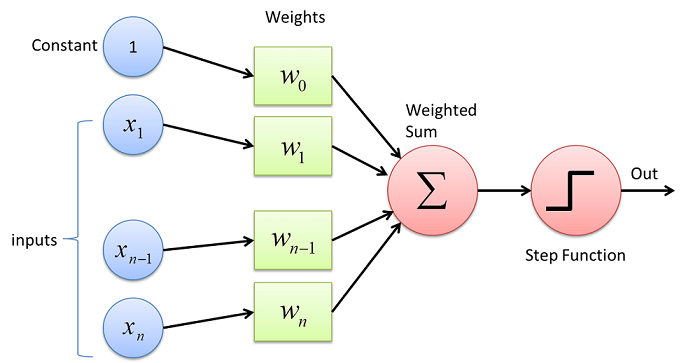


## Before We Begin ##

This lab is for you to understand simple perceptron. In this lab, we will learn how to implement the Perceptron model from scratch. In the second part, we will apply the Perceptron model to different datasets.

## NumPy revision 

In the following Tasks, you may need the help of NumPy. So, let's review how NumPy will help you do the calculation.
You can skip this section if you have no questions related to NumPy.

In [ ]:
import numpy as np

a = np.arange(5)
b = np.ones(5, dtype=int)
c = np.arange(10).reshape(2, 5)
d = np.arange(10).reshape(5, 2)
print(a)
print(b)
print(c)
print(d)

[0 1 2 3 4]
[1 1 1 1 1]
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [ ]:
# vector elementwise multiply, add, and dot product
print(a + b)
print(a + 9)
print(a * b)
print(a * 9)
print(np.dot(a, b))

[1 2 3 4 5]
[ 9 10 11 12 13]
[0 1 2 3 4]
[ 0  9 18 27 36]
10


In [ ]:
# vector elementwise math function
print(np.power(a, 2))
print(np.sqrt(a))
print(np.log(b))

[ 0  1  4  9 16]
[0.         1.         1.41421356 1.73205081 2.        ]
[0. 0. 0. 0. 0.]


In [ ]:
# matrix and vector sum 
print(np.sum(a))
print(np.sum(c))
print(np.sum(c, axis=0))
print(np.sum(c, axis=1))

10
45
[ 5  7  9 11 13]
[10 35]


In [ ]:
# vector elementwise checking
print(a > 0)
print((a > 0).astype(int))

[False  True  True  True  True]
[0 1 1 1 1]


In [ ]:
# matrix and vector slice
print(a[1:])
print(a[:-1])
print(c[:, 1])
print(c[:, -1])
print(c[1, :])
print(c[-1, :])
print(c[:, :-1])
#try more to learn about slicing

[1 2 3 4]
[0 1 2 3]
[1 6]
[4 9]
[5 6 7 8 9]
[5 6 7 8 9]
[[0 1 2 3]
 [5 6 7 8]]


In [ ]:
# matrix multiplication
print(np.matmul(c, a))  # (2, 5) @ (5, )  => (2, )
print(np.matmul(c, d))  # (2, 5) @ (5, 2) => (2, 2)
print(np.matmul(d, c))  # (5, 2) @ (2, 5) => (5, 5)
print(np.matmul(a, b))  # (5, )  @ (5, )  => ()

[30 80]
[[ 60  70]
 [160 195]]
[[  5   6   7   8   9]
 [ 15  20  25  30  35]
 [ 25  34  43  52  61]
 [ 35  48  61  74  87]
 [ 45  62  79  96 113]]
10


In [ ]:
# .matmul & .dot behave similarly for 1-D & 2-D array
# but they behave differently for N-D arrays with N > 2
x = np.arange(18).reshape(2, 3, 3)  # an array with two 3-by-3 matrices
y = np.arange(18).reshape(2, 3, 3)  # same as x
print("shape of x (also y):", x.shape)

# .matmul treats the array like a stack of matrices residing in the last two axes,
# i.e., matmul(x, y)[i, j, k] = matmul(x[i], y[i])[j, k]
print("shape of np.matmul(x, y):", np.matmul(x, y).shape)

# .dot produces a sum product over the last axis of x and the second-to-last axis of y,
# i.e., dot(x, y)[i, j, k, m] = sum(x[i, j, :] * y[k, :, m]).
print("shape of np.dot(x, y):", np.dot(x, y).shape)

shape of x (also y): (2, 3, 3)
shape of np.matmul(x, y): (2, 3, 3)
shape of np.dot(x, y): (2, 3, 2, 3)


# 1. The perceptron model

In this section, we mainly define the training process of a Perceptron model. To accomplish that, we need to do the following:

>1. Set initial weight and bias for perceptron 
>2. Predict the label with input variables, weight, and bias
>3. Update the weight and bias according to the "distance" between the predicted label and the true label
>4. Repeat processes __2__ and __3__ to do the training

You need to fill the TODOs to implement the Perceptron class, which can be reused for different datasets.

There are 3 functions in the model: `__init__`, `fit` and `predict`.<br>
>The `__init__` will help create the perceptron model and initialize the variables.<br>
>The `fit` will help train the perceptron model by updating variables in class with a given dataset.<br>
>The `predict` function will help calculate the value based on input and class variables, and then return the class label.




## Task 1.1

Initialize the __weights_and_bias__ inside the `fit` function.

__weights_and_bias__ represent all trainable variables, including "weight", and “bias”. So that the vector length of __weights_and_bias__ should be: <br>
>1 + the number of features.

Putting all trainable parameters in one variable is useful when we want to pass, manage, and update them, especially highly related parameters (bias and weight will be used and updated simultaneously).



## Task 1.2

Implement the training function `fit`, which will take __X__ and __Y__ as input to update __weights_and_bias__ for our perceptron model.

The __weights_and_bias__ should be updated according to the value of the data sample in __X__ and the difference between prediction and the true labels:

>1. predict the label with input features and __weights_and_bias__
>2. update __weights_and_bias__ according to the "distance" between the predicted label and true label
>3. repeat the process __1__ and __2__ to do the training

Meanwhile, record the number of mismatches in each epoch so that we can visualize the training process later.
You can do so by checking the error terms __delta__ for each data sample, and putting the count of non-zero ones in each epoch into the error list __errors__. 
> E.g. There are 5 mismatchings (__delta__ != 0) in the first epoch, then we append __5__ to the __errors__.

As we mentioned in the review notebook, there are different rules to stop the training process. Use the following rule to stop before __max_epoch__ is reached:
* Stop when $accuracy$ is high enough. Similar to the above, we can count the accuracy level after each epoch. If the accuracy exceeds a certain number, stop the training process.

Specifically, we set the number as __0.98__, and reuse the number of mismatches in each epoch recorded above to calculate the accuracy.
>E.g. There are 5 mismatchings (__delta__ != 0) in the first epoch, and there are __n__ data samples in X. Then the accuracy for the first epoch should be $1-\frac{5}{n}$.




## Task 1.3

Implement the prediction function `predict`, which takes __X__ as input to calculate and return the prediction. 
To do so, you should consider how perceptron uses weight and bias to predict the labels.

Utilize __.dot()__ or __.matmul()__ function to meet the following requirements:

- The prediction function can take __X__ in both matrix (#samples > 1) and vector (#samples = 1) form. 
- Return the prediction in an integer-type array when #samples > 1, or just as an integer (i.e., 0 or 1) when #samples = 1.
- Do not use any loop.

If the __X__ is a matrix (2-D array): 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix} 

and __weights_and_bias__ is
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of the prediction in matrix form will be like this:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\ 
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn} 
\end{bmatrix}\cdot
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+
\begin{bmatrix}
    \theta\\      
    \theta\\    
    \vdots \\
    \theta     
\end{bmatrix}
=\begin{bmatrix}
    Y_{1}\\      
    Y_{2}\\    
    \vdots \\
    Y_{d}     
\end{bmatrix}$$

If the __X__ is a vector (1-D array): 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} 

and __weights_and_bias__ is
\begin{bmatrix}
    \theta \\
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}

Then, the calculation of the prediction in vector form will be like this:

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
\end{bmatrix} \cdot
\begin{bmatrix}
    w_{1}\\      
    w_{2}\\    
    \vdots \\
    w_{n}     
\end{bmatrix}+ \theta     
=Y_{1}$$

Try to use NumPy operations to construct the function. 

In [29]:
import numpy as np


class MyPerceptron(object):
    def __init__(self, lr=0.01, epoch=10, in_weight=0.0):
        self.lr = lr  # learning rate
        self.epoch = epoch  # the max epoch of training
        self.in_weight = in_weight  # the initial value of weights_and_bias

    def fit(self, X, Y):
        # Fit the training data
        # X: Training vectors, X.shape = [#samples, #features]
        # Y: Target values, Y.shape = [#samples]

        # TODO:
        # - create a NumPy array to store the weights and bias
        # - initialze the weights and bias with a same value according to self.in_weight
        self.weights_and_bias = np.full(X.shape[1] + 1, self.in_weight)

        # create the list that records the number of misclassifications in each epoch
        self.errors = []

        # TODO:
        # - update self.weights_and_bias according to the features and the difference between the predictions and the true labels
        # - record the number of misclassifications in each epoch
        # - stop when the prediction accuracy is at least 0.98 (or the number of epochs reach self.epoch)
        # note: you may use self.predict here which will be implemented in task 1.3
        i = 0
        while i < self.epoch:
            # YOUR CODE HERE
            countError = 0
            for xi, yi in zip(X, Y):
              delta = yi - self.predict(xi)              
              if (delta != 0):
                self.weights_and_bias[0] += self.lr * delta
                self.weights_and_bias[1:] += self.lr * delta * xi
                countError += 1
             
            self.errors.append(countError)
            accuarcy = 1 - (self.errors[i]/X.shape[0])
            if (accuarcy >= 0.98):
              break;

            i += 1
    
    def predict(self, X):
        # Predict the labels
        # X: Test vectors, X.shape = [#samples, #features]

        # TODO:
        # predict the labels based on the features and self.weights_and_bias
        prediction = np.dot(X, self.weights_and_bias[1:]) + self.weights_and_bias[0]
        prediction = (prediction > 0).astype(int)
        return prediction

# 2. Prepare the dataset

After preparing the model, it is time to try out the model on various datasets. The datasets we will use in this lab are the __Sonar__ dataset and the __Iris__ dataset:

- The __Sonar__ dataset describes the information collected from a sonar system. The features are the strength of the signal from different angles, while the prediction variables (the letter __R__ or __M__) indicate the type of object (__rocks__ or __metal__). It is a binary classification problem that we can use our model to solve.

- The __Iris__ dataset describes the information about 3 kinds of iris plants. The dataset contains 3 classes of 50 instances each. The features are sepal length, sepal width, petal length and petal width, while the prediction variables (the texts) indicate the type of iris plant. We will take 2 classes (__Iris-setosa__ and __Iris-versicolor__) of this dataset to formulate a binary classification problem.



Run the following code to load the sonar dataset.

In [1]:
import pandas as pd
dataset1 = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', index_col=False, header=None)
dataset1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M




Run the following code to load the iris dataset.

In [7]:
import pandas as pd
dataset2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
dataset2 = dataset2[:100]  # take two classes
dataset2

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


## Vector representation transformation 
As we can see, the data inputs are in __float__ format, while the labels are in __string__ format. To utilize them to build a model, we need to transform labels into numbers. 

The label transformation here is  the __LabelEncoder__ we used in Lab3.

Run the following codes to perform the transformation.

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for k in dataset1.keys():
    if type(dataset1[k][0]) == str:
        dataset1[k] = encoder.fit_transform(dataset1[k])

In [9]:
for k in dataset2.keys():
    if(type(dataset2[k][0]) == str):
        dataset2[k] = encoder.fit_transform(dataset2[k])

Then you can check the numeric data now.
Compare it with the original one to find differences (hint: last column).

In [ ]:
dataset1

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [ ]:
dataset2

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


# 3. Fit perceptron model for different datasets 

In this section, we will apply our perceptron model to the dataset mentioned and examine the performance.

## Task 3.1: Split the train set and test set 

First, the data are split along the second axis into features __X__ and labels __Y__.

Second, you need to split __X__ and __Y__ along the first axis into train set and test set (__75%__ for training to __25%__ for testing in the sonar dataset; __70%__ for training to __30%__ for testing in the iris dataset). You can do so by using the function `train_test_split` from sklearn to do the train/test set splitting. Please use the number __3__ for the __random_state__ parameter of `train_test_split`.

In [12]:
from sklearn.model_selection import train_test_split
np_dataset1=dataset1.to_numpy()

X1 = np_dataset1[:, :-1]
Y1 = np_dataset1[:, -1]

# TODO:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 3) 

In [52]:
np_dataset2=dataset2.to_numpy()

X2 = np_dataset2[:, :-1]
Y2 = np_dataset2[:, -1]

# TODO:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 3) 

## Visualize the datasets
We can plot the iris dataset via two-dimensional scatter for better understanding.

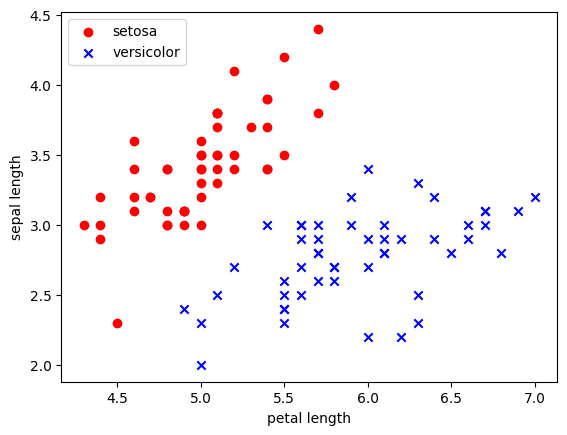

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X2[:50, 0], X2[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X2[50:100, 0], X2[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

But it is hard to plot the sonar dataset in two-dimensional scatter as it contains 60 categories.

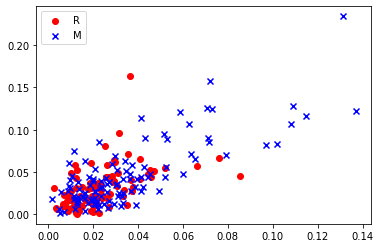

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X1[:97, 0], X1[:97, 1], color='red', marker='o', label='R')
plt.scatter(X1[97:, 0], X1[97:, 1], color='blue', marker='x', label='M')
plt.legend(loc='upper left')
plt.show()

## Task 3.2: Fit the models
Initialize and train our perceptron model on the sonar dataset and iris data subset.

To perform initialization and training, you can create an object from the perceptron class, and call the `fit` function to train the model.

For the sonar dataset, set the learning rate and epochs as 0.01 and 500, and initialize all variables in __weights_and_bias__ as 0.

You can also try other combinations of hyperparameters (learning rate, epochs, etc.).
Different hyperparameters may produce different outcomes.

In [31]:
# TODO:
sonar_perceptron = MyPerceptron(0.01, 500)
sonar_perceptron.fit(X1_train, Y1_train)

Plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two sonar classes.

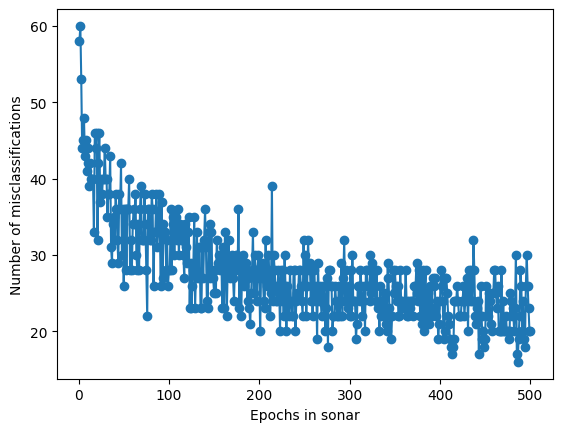

In [32]:
plt.plot(range(1, len(sonar_perceptron.errors) + 1), sonar_perceptron.errors, marker='o')
plt.xlabel('Epochs in sonar')
plt.ylabel('Number of misclassifications')
plt.show()

For the iris dataset, set the learning rate and epochs as 0.01 and 20, and initialize all variables in __weights_and_bias__ as 0. 

In [48]:
# TODO:
iris_perceptron = MyPerceptron(0.01, 20)
iris_perceptron.fit(X2_train, Y2_train)

Plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes.

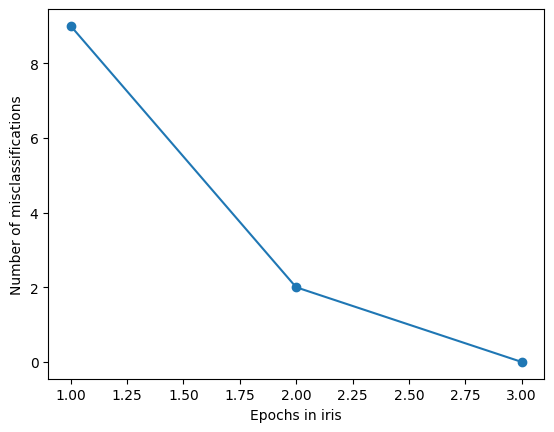

In [34]:
plt.plot(range(1, len(iris_perceptron.errors) + 1), iris_perceptron.errors, marker='o')
plt.xlabel('Epochs in iris')
plt.ylabel('Number of misclassifications')
plt.show()

## Prediction and evaluate the performance

Finally, we can evaluate the model on the test set.


In [37]:
prediction = sonar_perceptron.predict(X1_test)

In [38]:
prediction2 = iris_perceptron.predict(X2_test)

Following is the accuracy metric provided by sklearn. 

In [39]:
from sklearn import metrics
print("accuracy for sonar_perceptron: ", metrics.accuracy_score(Y1_test, prediction))
print("accuracy for iris_perceptron: ", metrics.accuracy_score(Y2_test, prediction2))

accuracy for sonar_perceptron:  0.6349206349206349
accuracy for iris_perceptron:  0.9666666666666667




Let us use another metric to evaluate the performance: The __F1__ score.

__F1__ score is a balance score that cares about not only precision but also recall.

In [54]:
print("F1 for sonar_perceptron: ", metrics.f1_score(Y1_test, prediction))
print("F1 for iris_perceptron: ", metrics.f1_score(Y2_test, prediction2))

F1 for sonar_perceptron:  0.5306122448979592


ValueError: ignored

# Perceptron in sklearn
You can change the __in_weight__, __lr__, __epoch__.... and run the training process again.

With different parameter settings, you may get different accuracy score.

As we do not need to submit this lab, here the accuracy score of the perceptron model implemented by sklearn is included as a reference.

In [50]:
from sklearn.linear_model import Perceptron

input = X1_train
output = Y1_train
weights = {0:0.1, 1:0.5}
model = Perceptron(class_weight=weights, eta0=0.1)
model.fit(input, output)
prediction2 = model.predict(X1_test)

In [51]:
print(metrics.accuracy_score(Y1_test, prediction2))

0.5873015873015873
